In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import re
import time

from pprint import pprint
from copy import copy, deepcopy

#########
import requests
import bs4
Soup = bs4.BeautifulSoup

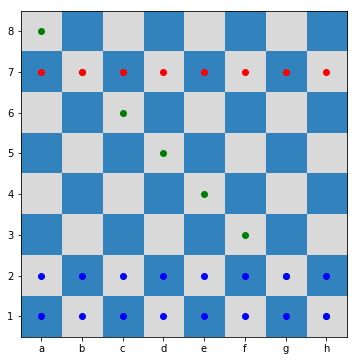

In [4]:
def generate_board():
    # board
    BOARD = np.zeros((8,8), dtype=int)
    BOARD[1::2, 0::2] = 1
    BOARD[0::2, 1::2] = 1
    generate_board.binary_board = BOARD
    fig, ax1 = plt.subplots(figsize=(6,6))
    labels = range(0, 8, 1)
    # x-axis
    plt.xticks(labels)
    ax1.set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
    # y-axis
    plt.yticks(labels)
    ax1.set_yticklabels(['8', '7', '6', '5', '4', '3', '2', '1'])
    # plot
    plt.imshow(BOARD, cmap='tab20c_r')
    plt.plot([0,1,2,3,4,5,6,7],
             'go')
    plt.plot([0,1,2,3,4,5,6,7],
             [1,1,1,1,1,1,1,1],
             'ro')
    plt.plot([0,1,2,3,4,5,6,7],
             [6,6,6,6,6,6,6,6],
             'bo')
    plt.plot([0,1,2,3,4,5,6,7],
             [7,7,7,7,7,7,7,7],
             'bo')
    
#     newax = fig.add_axes([.135,.125,.095,.095])
#     newax.imshow(bishop_b)
#     newax.axis('off')
generate_board()

In [5]:
binary = generate_board.binary_board.copy()
binary

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [6]:
def start_board():
    start = np.zeros((8,8), dtype=str).tolist()
    promoted_line_b = ['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b']
    pawn_line_b = ['P1b', 'P2b', 'P3b', 'P4b', 'P5b', 'P6b', 'P7b', 'P8b']
    pawn_line_w = ['P1w', 'P2w', 'P3w', 'P4w', 'P5w', 'P6w', 'P7w', 'P8w']
    promoted_line_w = ['R1w', 'N1w', 'B1w', 'Q0w', 'K0w', 'B2w', 'N2w', 'R2w']
#     for i in range(0, len(start[0])):
#         start[1][i] = 'Pb'
#         start[6][i] = 'Pw'
    start[0] = promoted_line_b
    start[1] = pawn_line_b
    start[-2] = pawn_line_w
    start[-1] = promoted_line_w
    new = []
    for each_row in start:
        for n,i in enumerate(each_row):
            if i == '':
                each_row[n] = '   '
#             if each_row[each_col] == '':
#                 each_row[each_col] = 1
    return start

In [7]:
# creating conversion
a_n = {"a": 0, "b": 1, "c": 2, "d": 3,
       "e": 4, "f": 5, "g": 6, "h": 7}
# inverse
n_a = {j:i for i,j in a_n.items()}

# start board
board = deepcopy(start_board())
pprint(board)

[['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b'],
 ['P1b', 'P2b', 'P3b', 'P4b', 'P5b', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', 'P4w', 'P5w', 'P6w', 'P7w', 'P8w'],
 ['R1w', 'N1w', 'B1w', 'Q0w', 'K0w', 'B2w', 'N2w', 'R2w']]


In [8]:
def parse_game(string):
    """
    Returns a DICTIONARY of all turns from the game.
    
    Example:
    >>> parse_game(game1)
    {1: ['c4', 'e6'],
     2: ['Nf3', 'd5'], ...}
    """
    full_game = string
    full_game_turns_only = re.sub(r'[0-9]{1,3}\.', '', full_game)
    full_game_ep1 = re.sub('e.p.', 'ep', full_game_turns_only)
    full_game_ep2 = re.sub(r' e\.?p\.?', 'ep', full_game_ep1)
    full_game_latest = full_game_ep2
    turns = full_game_latest.split()
    
    turns_dict = {}
    for i in range(0, len(turns[::2])):
        try: turns_dict[i+1] = [turns[::2][i], turns[1::2][i]]
        except: turns_dict[i+1] = [turns[::2][i]]
    return turns_dict

In [9]:
# outside information
game0_short = '1.c4 e6 2.Nf3 d5 3.d4 Nf6 4.Nc3 Be7 5.Bg5 0-0 6.e3 h6 7.Bh4 b6 8.cxd5 Nxd5 9.Bxe7 Qxe7 10.Nxd5 exd5 11.Rc1 Be6 12.Qa4 c5 13.Qa3 Rc8 14.Bb5 a6 15.dxc5 bxc5 16.0-0 Ra7 17.Be2 Nd7 18.Nd4 Qf8 19.Nxe6 fxe6 20.e4 d4 21.f4 Qe7 22.e5 Rb8 23.Bc4 Kh8 24.Qh3 Nf8 25.b3 a5 26.f5 exf5 27.Rxf5 Nh7 28.Rcf1 Qd8 29.Qg3 Re7 30.h4 Rbb7 31.e6 Rbc7 32.Qe5 Qe8 33.a4 Qd8 34.R1f2 Qe8 35.R2f3 Qd8 36.Bd3 Qe8 37.Qe4 Nf6 38.Rxf6 gxf6 39.Rxf6 Kg8 40.Bc4 Kh8 41.Qf4 1-0'
test_special_char = '42.Ng1-f3 Ng1-f3 43.Ng1+f3 Ng1+f3 44.Ng1f3+ Ng1f3+ 45.Ng1#f3 Ng1#f3 46.Ng1f3# Ng1f3# 47.h8=Q h8=Q 48.h8= h8= 49.0-0 0-0 50.0-0-0 0-0-0 51.d4e.p. d4e.p. 52.d4ep d4ep 53.d4 e.p. d4 e.p. 54.d4 ep d4 ep'
game1_long = '1.Pe2e4 Pc7c5 2.Ng1f3 Pe7e6 3.Pc2c4 Nb8c6 4.Pd2d4 Pc5xd4 5.Nf3xd4 Bf8c5 6.Nd4c2 Ng8f6 7.Nb1c3 0-0 8.Bc1e3 Pb7b6 9.Bf1e2 Bc8b7 10.0-0 Qd8e7 11.Qd1d2 Rf8d8 12.Rf1d1 Nc6e5 13.Be3xc5 Pb6xc5 14.Pf2f4 Ne5g6 15.Qd2e3 Pd7d6'
oscar_ikhlas_071919_short = '1.e4 e6 2.g3 Bc5 3.Bg2 Qf6 4.Nf3 g5 5.h3 Nc6 6.c3 d5 7.d3 d4 8.Bxg5 Qg7 9.c4 f6 10.Bh4 f5 11.Nbd2 b6 12.exf5 exf5 13.Ng5 Nb4 14.O-O Nxd3 15.Bxa8 Nxb2 16.Qe2+ Kf8 17.Bc6 Ne7 18.Bg2 h6 19.Ngf3 d3 20.Bxe7+ Bxe7 21.Qe5 Bf6 22.Qb5 Rg8 23.Rab1 Na4 24.Qxa4 f4 25.g4 Bxg4 26.c5 Bxf3 27.Nxf3 Qxg2#'
oscar_ikhlas_071919_long = '1.Pe2e4 Pe7e6 2.Pg2g3 Bf8c5 3.Bf1g2 Qd8f6 4.Ng1f3 Pg7g5 5.Ph2h3 Nb8c6 6.Pc2c3 Pd7d5 7.Pd2d3 Pd5d4 8.Bc1xg5 Qf6g7 9.Pc3c4 Pf7f6 10.Bg5h4 Pf6f5 11.Nb1d2 Pb7b6 12.Pe4xf5 Pe6xf5 13.Nf3g5 Nc6b4 14.O-O Nb4xd3 15.Bg2xa8 Nd3xb2 16.Qd1e2+ Ke8f8 17.Ba8c6 Ng8e7 18.Bc6g2 Ph7h6 19.Ng5f3 Pd4d3 20.Bh4xe7+ Bc5xe7 21.Qe2e5 Be7f6 22.Qe5b5 Rh8g8 23.Ra1b1 Nb2a4 24.Qb5xa4 Pf5f4 25.Pg3g4 Bc8xg4 26.Pc4c5 Bg4xf3 27.Nd2xf3 Qg7xg2#'

In [10]:
def parse_move(string):
    """
    Parses a move into:
        STRINGs of unit, from_coord, to_coord,
        and
        BOOLEANs of capture, castling, and check status.
    
    Examples:
    >>> parse_move('f3'):
    ('P', 'f?', 'f3', False, False, False)
    >>> parse_move('Ng1-f3'):
    ('N', 'g1', 'f3', False, False, False)
    >>> parse_move('Q7xf6+')
    ('Q', '7?', 'f6', True, False, True)
    >>> parse_move('Qb3xb4')
    ('Q', 'b3', 'b4', True, False, False)
    
    Todo: Check for capitalization in 'x' for example (non-urgent)
    """
    # check state
    check = False
    if '+' in string: check = True
    if '++' in string: check = True
    if '#' in string: check = True
    
    # unit
    try: unit = re.match(r'^[R|N|B|Q|K]', string)[0]
    except: unit = 'P'

    # capture
    capture = False
    if re.search('x|ep', string):
        capture = True

    # positions
    pos = re.findall(r'[a-h][1-8]', string)
    from_ = '?'
    to_ = '?'
    if len(pos) > 1:
        from_ = pos[0]
        to_ = pos[1]
    elif len(pos) == 1:
        to_ = pos[0]
        # parse from_ character before capture 'x'
        if from_ == '?':
            try: from_ = re.search(r'[a-h][x]', string)[0][0] + '?'
            except: pass
        if from_ == '?':
            try: from_ = '?' + re.search(r'[1-8][x]', string)[0][0]
            except: pass
        # parse from_ character with no 'x'
        if from_ == '?':
            try: from_ = re.search(r'[a-h][a-h][1-8]', string)[0][0] + '?'
            except: pass
        if from_ == '?':
            try: from_ = '?' + re.search(r'[1-8][a-h][1-8]', string)[0][0]
            except: pass
        # if pawn and no other info, from_ is on the same file.
        if from_ == '?' and unit == 'P':
            try: from_ = pos[0][0] + '?'
            except: pass
    
    # castling
    castling = False
    castling_options = ['O-O', 'O-O-O', '0-0', '0-0-0']
    if string in castling_options:
        unit, from_, to_, capture, castling = '?', '?', '?', True, True

    return unit, from_, to_, capture, castling, check

In [11]:
def find_unit_at_pos(pos):
    """
    Returns a STRING of the unit at a position given the
    current state of the board.
    
    Example:
    >>> find_unit_at_pos('d1')
    Q w
    """
    x = a_n[pos[0].lower()]
    y = 8 - int(pos[1])
    return board[y][x]

def find_unit_at_coord(coord):
    """
    Returns a STRING of the unit at a coordinate given
    the current state of the board.
    
    Example:
    >>> find_unit_at_coord((0,7))
    R b
    """
    return board[coord[1]][coord[0]]

In [12]:
def chose_correct_unit(string, board=board):
    """
    Returns TRUE if unit was chosen correctly.
    
    Examples:
    >>> chose_correct_unit('Ra1a2')
    True
    >>> chose_correct_unit('Ra2a3')
    False
    """
    unit_parsed = parse_move(string)[0]
    unit_on_pos = find_unit_at_pos(parse_move(string)[1])
    if unit_parsed == unit_on_pos[0]: return True
    else: return False

def chose_empty_pos(string, board=board):
    """
    Returns TRUE if position traveling to is empty.
    
    Examples:
    >>> chose_empty_pos('b4')
    True
    >>> chose_empty_pos('g7')
    False
    """
    unit_on_pos = find_unit_at_pos(parse_move(string)[2])
    if unit_on_pos == '   ': return True
    else: return False

# returns TRUE if action was correct for position traveling to
def capture_was_correct(string):
    """
    Returns TRUE capture was correct for position traveling to
    
    Example:
    >>> capture_was_correct('Rbxb7')
    True
    
    Todo: Not yet tuned for en passant.
    """
    if parse_move(string)[3] == True:
        captured = True
    else: captured = False
    if captured == True and not(chose_empty_pos(string)) == True:
        return True
    if captured == False and not(chose_empty_pos(string)) == False:
        return True
    else: return False

In [13]:
def get_coord_from(string):
    """
    Returns tuple of array position of starting point.
    
    Example:
    >>> get_coord_from('Ra1b5')
    (0, 7)
    """
    x = None
    y = None
    try:
        x = a_n[parse_move(string)[1][0]]
    except: None
    try:
        y = 8 - int(parse_move(string)[1][1])
    except: None
    return x,y

def get_coord_to(string):
    """
    Returns tuple of array position of ending point.
    
    Example:
    >>> get_coord_to('Ra1b5')
    (1, 3)
    """
    x = None
    y = None
    try:
        x = a_n[parse_move(string)[2][0]]
    except: None
    try:
        y = 8 - int(parse_move(string)[2][1])
    except: None
    return x,y

In [14]:
# start
history = []
board = deepcopy(start_board())
player = 'w'
turn = 0

In [15]:
def move(string):
    global board
    global player
    global turn
    if chose_correct_unit(string) and capture_was_correct(string):
        piece_color = find_unit_at_pos(parse_move(string)[1])[-1]
        if player == 'w' and piece_color == 'w' or player == 'b' and piece_color == 'b':
            # change string positions
            past_pos = board[get_coord_from(string)[1]][get_coord_from(string)[0]]
            fut_pos = board[get_coord_to(string)[1]][get_coord_to(string)[0]]
            board[get_coord_to(string)[1]][get_coord_to(string)[0]] = past_pos
            board[get_coord_from(string)[1]][get_coord_from(string)[0]] = '   '
            
            # update board
            history.append(string)
            move.current = board
            board = move.current
            
            if player == 'w': player = 'b'
            elif player == 'b': player = 'w'
            turn += 1
    else:
        if player == 'w': who = 'White'
        else: who = 'Black'
        return board, turn, history, "Invalid move! It's " + who + "'s turn."
    
    return board, turn, history

def board_from_history(h):
    global board
    board = deepcopy(start_board())
    global player
    player = 'w'
    global turn
    turn = 0
    
    for each in h:
        move(each)
    return board

In [16]:
def all_coords():
    """
    Returns a LIST OF TUPLES of all coordinates on the board
    that are occupied by a unit.
    
    Example:
    >>> all_coords()
    [(0, 0), (1, 0), (2, 3), (1, 4), ...]
    """
    global board
    all_coords = []
    for i in range(0, len(board)):
        each_row = board[i]
        for each_pos in range(0, len(board)):
            if each_row[each_pos] != '   ':
                all_coords.append((each_pos, i))
    return all_coords

def coords_to_pos(list_of_coords, board=board):
    """
    Returns a LIST OF STRINGS of all positions on the board
    that are occupied by a unit.
    
    Example:
    >>> coords_to_pos(all_coords())
    ['a8', 'b8', 'c5', 'b4', ...]
    """
    translated_pos = []
    for i in range(len(list_of_coords)):
        translated_pos.append(n_a[list_of_coords[i][0]] + str(8 - list_of_coords[i][1]))
    return translated_pos

def unit_to_pos(unit_string):
    """
    Returns a STRING of the position given a unit name.
    
    Example:
    >>> unit_to_pos('P1w')
    a2
    """
    global board
    temp_board_array = np.array(board)
    position = coords_to_pos([(int(np.where(temp_board_array == unit_string)[1][0]),
                               int(np.where(temp_board_array == unit_string)[0][0]))])
    return position[0]


In [17]:
new = {}
for each in coords_to_pos(all_coords()):
    new[find_unit_at_pos(each)] = []
# sorted(new, key=lambda x: x[-1])
# new

In [18]:
def v_h_avail(string):
    """
    Returns 2 LISTs. The first are all available tuples of
    vertically & horizontally positioned coordinates from the
    given unit. The second are all available tuples of enemies that
    are vertically & horizontally positioned from the given unit.
    
    Example:
    >>> v_h_avail('Pa2a2')
    ([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 6)],
     [(0, 1)])
    """
    global player
    empty_board_moves = []
    can_attack = []
    
    # pos' to top    
    for i in range(1,7):
        next_add = (get_coord_from(string)[0], get_coord_from(string)[1] - i)
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] == player or next_add[1] < 0: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] != player:
            can_attack.append(next_add)
            break
        if next_add not in all_coords():
            empty_board_moves.append(next_add)

    # pos' to bottom
    for i in range(1,7):
        next_add = (get_coord_from(string)[0], get_coord_from(string)[1] + i)
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] == player or next_add[1] > 7: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] != player:
            can_attack.append(next_add)
            break
        if next_add not in all_coords():
            empty_board_moves.append(next_add)

    # pos' to right
    for i in range(1,7):
        next_add = (get_coord_from(string)[0] + i, get_coord_from(string)[1])
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] == player or next_add[0] > 7: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] != player:
            can_attack.append(next_add)
            break
        if next_add not in all_coords():
            empty_board_moves.append(next_add)

    # pos' to left
    for i in range(1,7):
        next_add = (get_coord_from(string)[0] - i, get_coord_from(string)[1])
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] == player or next_add[0] < 0: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] != player:
            can_attack.append(next_add)
            break
        if next_add not in all_coords():
            empty_board_moves.append(next_add)
    
    return sorted(empty_board_moves), sorted(can_attack)

def diag_avail(string):
    """
    Returns 2 LISTs. The first are all available tuples of
    diagonally positioned coordinates from the given unit.
    The second are all available tuples of enemies that are
    diagonally positioned from the given unit.
    
    Example:
    >>> diag_avail('Pa2a2')
    ([(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)],
     [(5, 1)])
    """
    global player
    empty_board_moves = []
    can_attack = []
    
    # pos' to top right
    for i in range(1,7):
        next_add = (get_coord_from(string)[0] + i, get_coord_from(string)[1] - i)
        if next_add[0] > 7 or next_add[1] < 0: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] == player: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] != player:
            can_attack.append(next_add)
            break
        if next_add not in all_coords():
            empty_board_moves.append(next_add)
    
    # pos' to top left
    for i in range(1,7):
        next_add = (get_coord_from(string)[0] - i, get_coord_from(string)[1] - i)
        if next_add[0] < 0 or next_add[1] < 0: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] == player: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] != player:
            can_attack.append(next_add)
            break
        if next_add not in all_coords():
            empty_board_moves.append(next_add)
    
    # pos' to bottom right
    for i in range(1,7):
        next_add = (get_coord_from(string)[0] + i, get_coord_from(string)[1] + i)
        if next_add[0] > 7 or next_add[1] > 7: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] == player: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] != player:
            can_attack.append(next_add)
            break
        if next_add not in all_coords():
            empty_board_moves.append(next_add)
    
    # pos' to bottom left
    for i in range(1,7):
        next_add = (get_coord_from(string)[0] - i, get_coord_from(string)[1] + i)
        if next_add[0] < 0 or next_add[1] > 7: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] == player: break
        if next_add in all_coords() and find_unit_at_coord(next_add)[-1] != player:
            can_attack.append(next_add)
            break
        if next_add not in all_coords():
            empty_board_moves.append(next_add)
    
    return sorted(empty_board_moves), sorted(can_attack)

In [19]:
# returns list of available PAWN positions
def P_avail(string):
    """
    Returns 2 LISTs. The first are all tuples of possible
    PAWN movements from the current position. The second are
    all tuples of possible PAWN movements from the current
    position where an enemy lies atop.
    
    Example:
    >>> P_avail('Pa2a3')
    ([(0, 5), (0, 4)],
     [])
    
    Todo: Does not yet recognize en passant.
    """
    # empty_coords = all possible coords minus INTERFERENCE of own team units
    empty_coords = []
    # can_attack = all possible coords where the enemy lies
    can_attack = []
    try: current_pos = all_coords(board=move.current)
    except: current_pos = all_coords()
    
    try:
        if chose_correct_unit(string) and player == 'w':
            # one position up
            one_up = (get_coord_from(string)[0], get_coord_from(string)[1] - 1)
            if 0 <= one_up[0] <= 7 and 0 <= one_up[1] <= 7:
                if one_up not in all_coords():
                    empty_coords.append(one_up)
            # two positions up
            two_up = (get_coord_from(string)[0], get_coord_from(string)[1] - 2)
            if 0 <= two_up[0] <= 7 and 0 <= two_up[1] <= 7:
                if two_up not in all_coords():
                    empty_coords.append(two_up)
            # can_attack
            l_diag = (get_coord_from(string)[0] - 1, get_coord_from(string)[1] - 1)
            if 0 <= l_diag[0] <= 7 and 0 <= l_diag[1] <= 7:
                if l_diag in all_coords() and find_unit_at_coord(l_diag)[-1] == 'b':
                    can_attack.append(l_diag)
            r_diag = (get_coord_from(string)[0] + 1, get_coord_from(string)[1] - 1)
            if 0 <= r_diag[0] <= 7 and 0 <= r_diag[1] <= 7:
                if r_diag in all_coords() and find_unit_at_coord(r_diag)[-1] == 'b':
                    can_attack.append(r_diag)
        if chose_correct_unit(string) and player == 'b':
            # one position down
            one_down = (get_coord_from(string)[0], get_coord_from(string)[1] + 1)
            if 0 <= one_down[0] <= 7 and 0 <= one_down[1] <= 7:
                if one_down not in all_coords():
                    empty_coords.append(one_down)
            # two positions down
            two_down = (get_coord_from(string)[0], get_coord_from(string)[1] + 2)
            if 0 <= two_down[0] <= 7 and 0 <= two_down[1] <= 7:
                if two_down not in all_coords():
                    empty_coords.append(two_down)
            # can_attack
            l_diag = (get_coord_from(string)[0] - 1, get_coord_from(string)[1] + 1)
            if 0 <= l_diag[0] <= 7 and 0 <= l_diag[1] <= 7:
                if l_diag in all_coords() and find_unit_at_coord(l_diag)[-1] == 'w':
                    can_attack.append(l_diag)
            r_diag = (get_coord_from(string)[0] + 1, get_coord_from(string)[1] + 1)
            if 0 <= r_diag[0] <= 7 and 0 <= r_diag[1] <= 7:
                if r_diag in all_coords() and find_unit_at_coord(r_diag)[-1] == 'w':
                    can_attack.append(r_diag)
    except: pass
    return sorted(empty_coords), sorted(can_attack)

In [20]:
def R_avail(string):
    """
    Returns 2 LISTs. The first are all tuples of possible
    ROOK movements from the current position. The second are
    all tuples of possible ROOK movements from the current
    position where an enemy lies atop.
    
    Example:
    >>> R_avail('Ra3a4')
    ([(0, 1), (0, 2), (0, 3), (0, 4), (1, 5)],
     [(0, 1), (1, 5)])
    """
    # empty_coords = all possible coords minus INTERFERENCE of own team units
    empty_coords = []
    # can_attack = all possible coords where the enemy lies
    can_attack = []
    try: current_pos = all_coords(board=move.current)
    except: current_pos = all_coords()
    
    try:
        if chose_correct_unit(string):
            empty_coords = v_h_avail(string)[0]
            can_attack = v_h_avail(string)[1]
    except: pass
    return sorted(empty_coords), sorted(can_attack)

In [21]:
def N_avail(string):
    """
    Returns 2 LISTs. The first are all tuples of possible
    KNIGHT movements from the current position. The second are
    all tuples of possible KNIGHT movements from the current
    position where an enemy lies atop.
    
    Example:
    >>> N_avail('Nd4f5')
    ([(1, 3), (1, 5), (2, 2), (4, 2), (5, 5)],
     [(5, 3)])
    """
    # empty_coords = all possible coords minus INTERFERENCE of own team units
    empty_coords = []
    # can_attack = all possible coords where the enemy lies
    can_attack = []
    try: current_pos = all_coords(board=move.current)
    except: current_pos = all_coords()
    
    try:
        if chose_correct_unit(string):
            possibles = []
            possibles.append((get_coord_from(string)[0] + 1, get_coord_from(string)[1] + 2))
            possibles.append((get_coord_from(string)[0] - 1, get_coord_from(string)[1] + 2))
            possibles.append((get_coord_from(string)[0] + 1, get_coord_from(string)[1] - 2))
            possibles.append((get_coord_from(string)[0] - 1, get_coord_from(string)[1] - 2))
            possibles.append((get_coord_from(string)[0] + 2, get_coord_from(string)[1] + 1))
            possibles.append((get_coord_from(string)[0] + 2, get_coord_from(string)[1] - 1))
            possibles.append((get_coord_from(string)[0] - 2, get_coord_from(string)[1] + 1))
            possibles.append((get_coord_from(string)[0] - 2, get_coord_from(string)[1] - 1))
            for each in possibles:
                if 0 <= each[0] <= 7 and 0 <= each[1] <= 7:
                    if each not in all_coords():
                        empty_coords.append(each)
                    if each in all_coords() and find_unit_at_coord(each)[-1] != player:
                        can_attack.append(each)
    except: pass
    return sorted(empty_coords), sorted(can_attack)

In [22]:
def B_avail(string):
    """
    Returns 2 LISTs. The first are all tuples of possible
    BISHOP movements from the current position. The second are
    all tuples of possible BISHOP movements from the current
    position where an enemy lies atop.
    
    Example:
    >>> B_avail('Bf1e2')
    ([(0, 2), (1, 3), (2, 4), (3, 5), (4, 6)],
     [(0, 2)])
    """
    # empty_coords = all possible coords minus INTERFERENCE of own team units
    empty_coords = []
    # can_attack = all possible coords where the enemy lies
    can_attack = []
    try: current_pos = all_coords(board=move.current)
    except: current_pos = all_coords()
    
    try:
        if chose_correct_unit(string):
            empty_coords = diag_avail(string)[0]
            can_attack = diag_avail(string)[1]
    except: pass
    return sorted(empty_coords), sorted(can_attack)

In [23]:
def Q_avail(string):
    """
    Returns 2 LISTs. The first are all tuples of possible
    QUEEN movements from the current position. The second are
    all tuples of possible QUEEN movements from the current
    position where an enemy lies atop.
    
    Example:
    >>> Q_avail('Qd1d2')
    ([(4, 6), (5, 5), (6, 4), (7, 3)],
     [(3, 6)])
    """
    # empty_coords = all possible coords minus INTERFERENCE of own team units
    empty_coords = []
    # can_attack = all possible coords where the enemy lies
    can_attack = []
    try: current_pos = all_coords(board=move.current)
    except: current_pos = all_coords()
    
    try:
        if chose_correct_unit(string):
            empty_coords = v_h_avail(string)[0]
            empty_coords.extend(diag_avail(string)[0])
            can_attack = v_h_avail(string)[1]
            can_attack.extend(diag_avail(string)[1])
    except: pass    
    return sorted(empty_coords), sorted(can_attack)

In [24]:
def K_avail(string):
    """
    Returns 2 LISTs. The first are all tuples of possible
    KING movements from the current position. The second are
    all tuples of possible KING movements from the current
    position where an enemy lies atop.
    
    Example:
    >>> K_avail('Ke1e2')
    ([(4, 6)],
     [(3, 6)])
    """
    # empty_coords = all possible coords minus INTERFERENCE of own team units
    empty_coords = []
    # can_attack = all possible coords where the enemy lies
    can_attack = []
    try: current_pos = all_coords(board=move.current)
    except: current_pos = all_coords()
    
    try:
        if chose_correct_unit(string):
            possibles = []
            # right side
            possibles.append((get_coord_from(string)[0] + 1, get_coord_from(string)[1]))
            possibles.append((get_coord_from(string)[0] + 1, get_coord_from(string)[1] - 1))
            possibles.append((get_coord_from(string)[0] + 1, get_coord_from(string)[1] + 1))
            # left side
            possibles.append((get_coord_from(string)[0] - 1, get_coord_from(string)[1]))
            possibles.append((get_coord_from(string)[0] - 1, get_coord_from(string)[1] - 1))
            possibles.append((get_coord_from(string)[0] - 1, get_coord_from(string)[1] + 1))
            # above/below
            possibles.append((get_coord_from(string)[0], get_coord_from(string)[1] - 1))
            possibles.append((get_coord_from(string)[0], get_coord_from(string)[1] + 1))

            for each in possibles:
                if 0 <= each[0] <= 7 and 0 <= each[1] <= 7:
                    if each not in all_coords():
                        empty_coords.append(each)
                    if each in all_coords() and find_unit_at_coord(each)[-1] != player:
                        can_attack.append(each)
    except: pass
    return sorted(empty_coords), sorted(can_attack)

In [25]:
def translate_avail_pos(string):
    """
    Returns 2 LISTs. The first are all possible positions of
    a unit type's movement from its current position. The
    second are all possible positions of the unit type's
    movement from the current position where an enemy lies atop.
    
    Example:
    >>> translate_avail_pos('Qa4b5')
    (['a3', 'a5', 'a6', 'a7', 'b3', 'c2', 'd1'],
     ['a8', 'b5'])
    """
    empty_list_of_pos = []
    enemy_list_of_pos = []
    unit = re.match(r'[PRNBQK]', string)[0]
    if unit == 'P':
        for each in coords_to_pos(P_avail(string)[0]): empty_list_of_pos.append(each)
        for each in coords_to_pos(P_avail(string)[1]): enemy_list_of_pos.append(each)
    elif unit == 'R':
        for each in coords_to_pos(R_avail(string)[0]): empty_list_of_pos.append(each)
        for each in coords_to_pos(R_avail(string)[1]): enemy_list_of_pos.append(each)
    elif unit == 'N':
        for each in coords_to_pos(N_avail(string)[0]): empty_list_of_pos.append(each)
        for each in coords_to_pos(N_avail(string)[1]): enemy_list_of_pos.append(each)
    elif unit == 'B':
        for each in coords_to_pos(B_avail(string)[0]): empty_list_of_pos.append(each)
        for each in coords_to_pos(B_avail(string)[1]): enemy_list_of_pos.append(each)
    elif unit == 'Q':
        for each in coords_to_pos(Q_avail(string)[0]): empty_list_of_pos.append(each)
        for each in coords_to_pos(Q_avail(string)[1]): enemy_list_of_pos.append(each)
    elif unit == 'K':
        for each in coords_to_pos(K_avail(string)[0]): empty_list_of_pos.append(each)
        for each in coords_to_pos(K_avail(string)[1]): enemy_list_of_pos.append(each)
    return sorted(empty_list_of_pos), sorted(enemy_list_of_pos)

In [26]:
# print(translate_avail_pos('Qd1d2'))
# move.current
# chose_correct_unit('Bb7c6')

In [27]:
def find_all_attacking():
    """
    Returns 2 DICTIONARIES. The first consists of lists
    of who White units can attack, and the second consists
    of lists of who Black units can attack.
    
    Example: find_all_attacking()
    ({'Q w': ['R b', 'P2b', 'N b', 'P3b', 'B b', 'P5b'],
      'P2w': [], ...}
     {'R b': ['P1w'],
      'B b': ['Q w'], ...})
    
    Todo: Does not properly account for units that were removed from
    the board.
    """
    global player
    global board
    dict_white_att = {}
    dict_black_att = {}
    
    if player == 'w':
        for each in all_coords():
            atk_list = []
            a_unit = find_unit_at_coord(each)
            if a_unit[-1] == 'w':
                fake = a_unit[0] + unit_to_pos(a_unit) + 'a1'
                for each in translate_avail_pos(fake)[1]: atk_list.append(find_unit_at_pos(each))
                dict_white_att[a_unit] = atk_list
                continue
        player = 'b'
        for each in all_coords():
            atk_list = []
            a_unit = find_unit_at_coord(each)
            if a_unit[-1] == 'b':
                fake = a_unit[0] + unit_to_pos(a_unit) + 'a8'
                for each in translate_avail_pos(fake)[1]: atk_list.append(find_unit_at_pos(each))
                dict_black_att[a_unit] = atk_list
        player = 'w'
    if player == 'b':
        for each in all_coords():
            atk_list = []
            a_unit = find_unit_at_coord(each)
            if a_unit[-1] == 'b':
                fake = a_unit[0] + unit_to_pos(a_unit) + 'a8'
                for each in translate_avail_pos(fake)[1]: atk_list.append(find_unit_at_pos(each))
                dict_black_att[a_unit] = atk_list
        player = 'w'
        for each in all_coords():
            atk_list = []
            a_unit = find_unit_at_coord(each)
            if a_unit[-1] == 'w':
                fake = a_unit[0] + unit_to_pos(a_unit) + 'a8'
                for each in translate_avail_pos(fake)[1]: atk_list.append(find_unit_at_pos(each))
                dict_white_att[a_unit] = atk_list
        player = 'b'
    return dict_white_att, dict_black_att

In [28]:
def convert_name(string):
    name = '?'
    u = parse_move(string)[0]
    if u == 'P': name = 'Pawn'
    elif u == 'R': name = 'Rook'
    elif u == 'N': name = 'Knight'
    elif u == 'B': name = 'Bishop'
    elif u == 'Q': name = 'Queen'
    elif u == 'K': name = 'King'
    return name

In [29]:
def describe_move(string):
    # unit info
    u = parse_move(string)[0]
    if u == 'P': u = 'Pawn'
    elif u == 'R': u = 'Rook'
    elif u == 'N': u = 'Knight'
    elif u == 'B': u = 'Bishop'
    elif u == 'Q': u = 'Queen'
    elif u == 'K': u = 'King'
    if player == 'w':
        p = 'White'
        p_not = 'Black'
    if player == 'b':
        p = 'Black'
        p_not = 'White'
    
    # move() function
    move(string)
    
    # action
    try:
        if p == 'White':
            if parse_move(string)[3] == True:
                prtA = "White moves their " + u + " from " + parse_move(string)[1] + " to " + parse_move(string)[2] + ", capturing " + p_not + "'s " + find_unit_at_pos(parse_move(string)[2]) + "."
                print(prtA)
            else:
                prtA = "White moves their " + u + " from " + parse_move(string)[1] + " to " + parse_move(string)[2] + "."
                print(prtA)
        if p == 'Black':
            if parse_move(string)[3] == True:
                prtA = "Black moves their " + u + " from " + parse_move(string)[1] + " to " + parse_move(string)[2] + ", capturing " + p_not + "'s " + find_unit_at_pos(parse_move(string)[2]) + "."
                print(prtA)
            else:
                prtA = "Black moves their " + u + " from " + parse_move(string)[1] + " to " + parse_move(string)[2] + "."
                print(prtA)
    except: pass
    
    # attacking
    unit_chosen = find_unit_at_pos(parse_move(string)[2])
    try:
        if p == 'White':
            can_attack = []
            can_attack_units = []
            if find_all_attacking()[0][unit_chosen] != []:
                for each in find_all_attacking()[0][unit_chosen]:
                    can_attack.append(each)
                for each in can_attack:
                    name = convert_name(each)
                    pos = unit_to_pos(each)
                    total = name + ' at ' + pos
                    can_attack_units.append(total)
                str1 = ', '.join(can_attack_units)
                prtB = "This "+ u + " can now capture " + p_not + "'s " + str1 + "."
                print(prtB)
    except: pass
    try:
        if p == 'Black':
            can_attack = []
            can_attack_units = []
            if find_all_attacking()[1][unit_chosen] != []:
                for each in find_all_attacking()[1][unit_chosen]:
                    can_attack.append(each)
                for each in can_attack:
                    name = convert_name(each)
                    pos = unit_to_pos(each)
                    total = name + ' at ' + pos
                    can_attack_units.append(total)
                str1 = ', '.join(can_attack_units)
                prtB = "This "+ u + " can now capture " + p_not + "'s " + str1 + "."
                print(prtB)
    except: pass
    
    # threatened by
    try:
        if p == 'White':
            attacked_by = []
            attacked_by_units = []
            for each in find_all_attacking()[1].keys():
                if unit_chosen in find_all_attacking()[1][each]:
                    attacked_by.append(each)
            if attacked_by != []:
                for each in attacked_by:
                    name = convert_name(each)
                    pos = unit_to_pos(each)
                    total = name + ' at ' + pos
                    attacked_by_units.append(total)
                str1 = ', '.join(attacked_by_units)
                prtC = p + "'s " + u + " can now be taken by " + p_not + "'s " + str1 + "."
                print(prtC)
    except: pass
    try:
        if p == 'Black':
            attacked_by = []
            attacked_by_units = []
            for each in find_all_attacking()[0].keys():
                if unit_chosen in find_all_attacking()[0][each]:
                    attacked_by.append(each)
            if attacked_by != []:
                for each in attacked_by:
                    name = convert_name(each)
                    pos = unit_to_pos(each)
                    total = name + ' at ' + pos
                    attacked_by_units.append(total)
                str1 = ', '.join(attacked_by_units)
                prtC = p + "'s " + u + " can now be taken by " + p_not + "'s " + str1 + "."
                print(prtC)
    except: pass
    try:
        if parse_move(string)[-1] == True:
            print("King is in check.")
    except: pass
    
#     return board

In [30]:
def describe_game(game_dict):
    for each_turn in [*parse_game(game_dict).values()]:
        for each in each_turn:
            describe_move(each)
            print('')
    return board

In [31]:
# start
history = []
board = deepcopy(start_board())
player = 'w'
turn = 0

In [40]:
# (get_coord_from('Pa2a3')[0], get_coord_from('Pa2a3')[1] - 1)
chose_empty_pos('Pa2a3')

True

In [32]:
game2_short = '1.e4 e5 2.Nf3 d6 3.d4 Bg4 4.dxe5 Bxf3 5.Qxf3 dxe5 6.Bc4 Nf6 7.Qb3 Qe7 8.Nc3 c6 9.Bg5 b5 10.Nxb5 cxb5 11.Bxb5+ Nbd7 12.Rd1 Rd8 13.f4 exf4 14.Bxf4 Nh5 15.Bc7 Qc5 16.Bxd8 Kxd8 17.Rxd7+ Kc8 18.Rxf7 a6 19.Qe6+ Kb8 20.Qe8+ Qc8 21.Qxc8+ Kxc8 22.Bd7+ Kd8 23.Rhf1 g5 24.h4 Kc7 25.R1f6 Kb8 26.Rxa6 Kb7 27.Bb5+ Kb8 28.Bc6 Kc8 29.Ra8#'
game2_long = '1.Pe2e4 Pe7e5 2.Ng1f3 Pd7d6 3.Pd2d4 Bc8g4 4.Pd4xe5 Bg4xf3 5.Qd1xf3 Pd6xe5 6.Bf1c4 Ng8f6 7.Qf3b3 Qd8e7 8.Nb1c3 Pc7c6 9.Bc1g5 Pb7b5 10.Nc3xb5 Pc6xb5 11.Bc4xb5 Nb8d7 12.Ra1d1 Ra8d8 13.Pf2f4 Pe5xf4 14.Bg5xf4 Nf6h5 15.Bf4c7 Qe7c5 16.Bc7xd8 Ke8xd8 17.Rd1xd7+ Kd8c8 18.Rd7xf7 Pa7a6 19.Qb3e6+ Kc8b8 20.Qe6e8+ Qc5c8 21.Qe8xc8+ Kb8xc8 22.Bb5d7+ Kc8d8 23.Rh1f1 Pg7g5 24.Ph2h4 Kd8c7 25.Rf1f6 Kc7b8 26.Rf6xa6 Kb8b7 27.Bd7b5 Kb7b8 28.Bb5c6 Kb8c8 29.Ra6a8#'
game2_long

'1.Pe2e4 Pe7e5 2.Ng1f3 Pd7d6 3.Pd2d4 Bc8g4 4.Pd4xe5 Bg4xf3 5.Qd1xf3 Pd6xe5 6.Bf1c4 Ng8f6 7.Qf3b3 Qd8e7 8.Nb1c3 Pc7c6 9.Bc1g5 Pb7b5 10.Nc3xb5 Pc6xb5 11.Bc4xb5 Nb8d7 12.Ra1d1 Ra8d8 13.Pf2f4 Pe5xf4 14.Bg5xf4 Nf6h5 15.Bf4c7 Qe7c5 16.Bc7xd8 Ke8xd8 17.Rd1xd7+ Kd8c8 18.Rd7xf7 Pa7a6 19.Qb3e6+ Kc8b8 20.Qe6e8+ Qc5c8 21.Qe8xc8+ Kb8xc8 22.Bb5d7+ Kc8d8 23.Rh1f1 Pg7g5 24.Ph2h4 Kd8c7 25.Rf1f6 Kc7b8 26.Rf6xa6 Kb8b7 27.Bd7b5 Kb7b8 28.Bb5c6 Kb8c8 29.Ra6a8#'

In [33]:
# describe_game(game2_long)
for each in parse_game(game2_long).values():
    for each1 in each:
#         print(each1)
        pprint(move(each1)[0])
#         print(len(move(each1)[2]))
#         pprint(find_all_attacking())
        print(describe_move(each1))
        print('')

[['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b'],
 ['P1b', 'P2b', 'P3b', 'P4b', 'P5b', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', 'P4w', '   ', 'P6w', 'P7w', 'P8w'],
 ['R1w', 'N1w', 'B1w', 'Q0w', 'K0w', 'B2w', 'N2w', 'R2w']]
Black moves their Pawn from e2 to e4.
None

[['R1b', 'N1b', 'B1b', 'Q0b', 'K0b', 'B2b', 'N2b', 'R2b'],
 ['P1b', 'P2b', 'P3b', 'P4b', '   ', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P5b', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', 'P4w', '   ', 'P6w', 'P7w', 'P8w'],
 ['R1w', 'N1w', 'B1w', 'Q0w', 'K0w', 'B2w', 'N2w', 'R2w']]
White moves 

None

[['R1b', 'N1b', '   ', '   ', 'K0b', 'B2b', '   ', 'R2b'],
 ['P1b', 'P2b', '   ', '   ', 'Q0b', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', 'P3b', '   ', '   ', 'N2b', '   ', '   '],
 ['   ', '   ', '   ', '   ', 'P4b', '   ', 'B1w', '   '],
 ['   ', '   ', 'B2w', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', 'Q0w', 'N1w', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', 'P6w', 'P7w', 'P8w'],
 ['R1w', '   ', '   ', '   ', 'K0w', '   ', '   ', 'R2w']]
Black moves their Bishop from c1 to g5.
None

[['R1b', 'N1b', '   ', '   ', 'K0b', 'B2b', '   ', 'R2b'],
 ['P1b', '   ', '   ', '   ', 'Q0b', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', 'P3b', '   ', '   ', 'N2b', '   ', '   '],
 ['   ', 'P2b', '   ', '   ', 'P4b', '   ', 'B1w', '   '],
 ['   ', '   ', 'B2w', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', 'Q0w', 'N1w', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', 'P6w', 'P7w', 'P8w'],
 ['R1w', '   ', '   ', '   ', 'K0w', '   ', '   ', 'R2w']]
Whit

King is in check.
None

[['   ', '   ', 'K0b', '   ', '   ', 'B2b', '   ', 'R2b'],
 ['P1b', '   ', '   ', 'R1w', '   ', 'P6b', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', 'B2w', 'Q0b', '   ', '   ', '   ', '   ', 'N2b'],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', 'Q0w', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', '   ', 'P7w', 'P8w'],
 ['   ', '   ', '   ', '   ', 'K0w', '   ', '   ', 'R2w']]
White moves their King from d8 to c8.
None

[['   ', '   ', 'K0b', '   ', '   ', 'B2b', '   ', 'R2b'],
 ['P1b', '   ', '   ', '   ', '   ', 'R1w', 'P7b', 'P8b'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', 'B2w', 'Q0b', '   ', '   ', '   ', '   ', 'N2b'],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', '   '],
 ['   ', 'Q0w', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', '   ', 'P7w', 'P8w'],
 ['   ', '   ', '   ', '   ', 'K0w', '   ', '  

None

[['   ', 'K0b', '   ', '   ', '   ', 'B2b', '   ', 'R2b'],
 ['   ', '   ', '   ', 'B2w', '   ', 'R1w', '   ', 'P8b'],
 ['R2w', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', 'P7b', 'N2b'],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', 'P8w'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', '   ', 'P7w', '   '],
 ['   ', '   ', '   ', '   ', 'K0w', '   ', '   ', '   ']]
Black moves their Rook from f6 to a6, capturing White's R2w.
None

[['   ', '   ', '   ', '   ', '   ', 'B2b', '   ', 'R2b'],
 ['   ', 'K0b', '   ', 'B2w', '   ', 'R1w', '   ', 'P8b'],
 ['R2w', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['   ', '   ', '   ', '   ', '   ', '   ', 'P7b', 'N2b'],
 ['   ', '   ', '   ', '   ', 'P5w', '   ', '   ', 'P8w'],
 ['   ', '   ', '   ', '   ', '   ', '   ', '   ', '   '],
 ['P1w', 'P2w', 'P3w', '   ', '   ', '   ', 'P7w', '   '],
 ['   ', '   ', '   ', '   ', 'K0w', '   '